In [89]:
import numpy as np 
import pandas as pd 


In [90]:
df = pd.read_csv("C:/Users/Saurabh/Downloads/archive (10)/Churn_Modelling.csv")

In [91]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [92]:
df.shape

(10000, 14)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [94]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [95]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [96]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [97]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [98]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [99]:

X=df.drop(columns=["Exited"])
Y=df["Exited"]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [102]:
model = Sequential()

model.add(Dense(5,activation='relu',input_dim=11))
model.add(Dense(3,activation='relu',input_dim=5))
model.add(Dense(1,activation='sigmoid'))

C:\Users\Saurabh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82 (328.00 B)

 Trainable params: 82 (328.00 B)

 Non-trainable params: 0 (0.00 B)

In [104]:
model.compile(loss='binary_crossentropy',optimizer="Adam")

In [105]:
history=model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5085 - val_loss: 0.4802
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4703 - val_loss: 0.4597
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4637 - val_loss: 0.4499
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4321 - val_loss: 0.4434
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4473 - val_loss: 0.4398
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4356 - val_loss: 0.4373
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4331 - val_loss: 0.4360
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4422 - val_loss: 0.4351
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4326 - val_loss: 0.4342
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4298 - val_loss: 0.4328
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4272 - val_loss: 0.4316
Epoch 12/100
200/200 ━━━━━━━━━━━━━━━━━━━━

In [106]:
import matplotlib.pyplot as plt


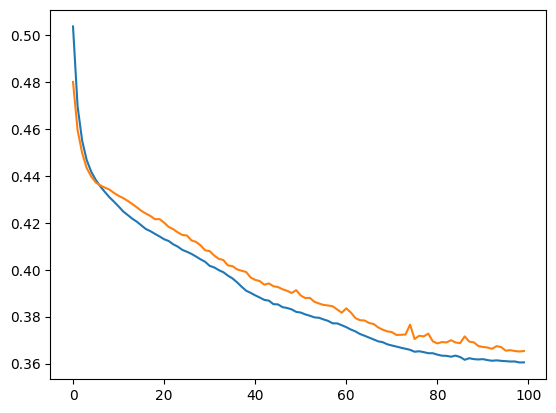

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [108]:
model.layers[1].get_weights()

[array([[ 0.43942693,  1.1495783 ,  0.5876006 ],
        [ 0.5192696 , -0.34512886,  0.9905945 ],
        [-0.6103366 , -2.6252344 , -0.35763967],
        [-0.6074952 ,  0.11936738,  1.1118556 ],
        [ 0.5468229 , -0.24550208,  0.18584143]], dtype=float32),
 array([ 0.6985712 , -0.00730509, -0.01962147], dtype=float32)]

In [109]:
Y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [110]:
Y_pred=np.where(Y_log>0.5,1,0)

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8525